In [2]:
# import python libraries

import pandas as pd

import matplotlib.pyplot as plt # visualizing data
%matplotlib inline


In [3]:
#import csv file
data = pd.read_csv(r"C:\Users\bhask\Documents\MY Files\Website_Performance_Analysis\Data-Export.csv")

In [4]:
data.shape

(3183, 10)

In [5]:
data.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
3,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044


##
###### There are some errors in the first row of the dataset, which usually occurs while collecting the data from websites. The data starts from the second row, so handled it accordingly:

In [6]:
new_header = data.iloc[0]  # grabbed the first row for the header
data = data[1:]  # took the data less the header row
data.columns = new_header  # set the header row as the df header
data.reset_index(drop=True, inplace=True)

print(data.head())

0 Session primary channel group (Default channel group)  \
0                                             Direct      
1                                     Organic Social      
2                                             Direct      
3                                     Organic Social      
4                                     Organic Social      

0 Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
0               2024041623   237      300              144   
1               2024041719   208      267              132   
2               2024041723   188      233              115   
3               2024041718   187      256              125   
4               2024041720   175      221              112   

0 Average engagement time per session Engaged sessions per user  \
0                         47.52666667               0.607594937   
1                         32.09737828               0.634615385   
2                         39.93991416               0.611702128   
3   

In [7]:
data.shape

(3182, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

##
##### Converted the date column into an appropriate datetime format and group it for further analysis:

In [9]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

In [10]:
# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

print(data.head(3))

0 Session primary channel group (Default channel group)  \
0                                             Direct      
1                                     Organic Social      
2                                             Direct      

0 Date + hour (YYYYMMDDHH)  Users  Sessions Engaged sessions  \
0      2024-04-16 23:00:00    237       300              144   
1      2024-04-17 19:00:00    208       267              132   
2      2024-04-17 23:00:00    188       233              115   

0 Average engagement time per session Engaged sessions per user  \
0                         47.52666667               0.607594937   
1                         32.09737828               0.634615385   
2                         39.93991416               0.611702128   

0 Events per session Engagement rate Event count  
0        4.673333333            0.48        1402  
1         4.29588015     0.494382022        1147  
2        4.587982833     0.493562232        1069  


In [11]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
data.describe()

,Date + hour (YYYYMMDDHH),Users,Sessions
count,3182,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646
min,2024-04-06 00:00:00,0.000000,1.000000
25%,2024-04-13 02:15:00,20.000000,24.000000
50%,2024-04-20 02:00:00,42.000000,51.000000
75%,2024-04-26 22:00:00,60.000000,71.000000
max,2024-05-03 23:00:00,237.000000,300.000000
std,NaN,29.582258,36.919962


### Session Trend Analysis

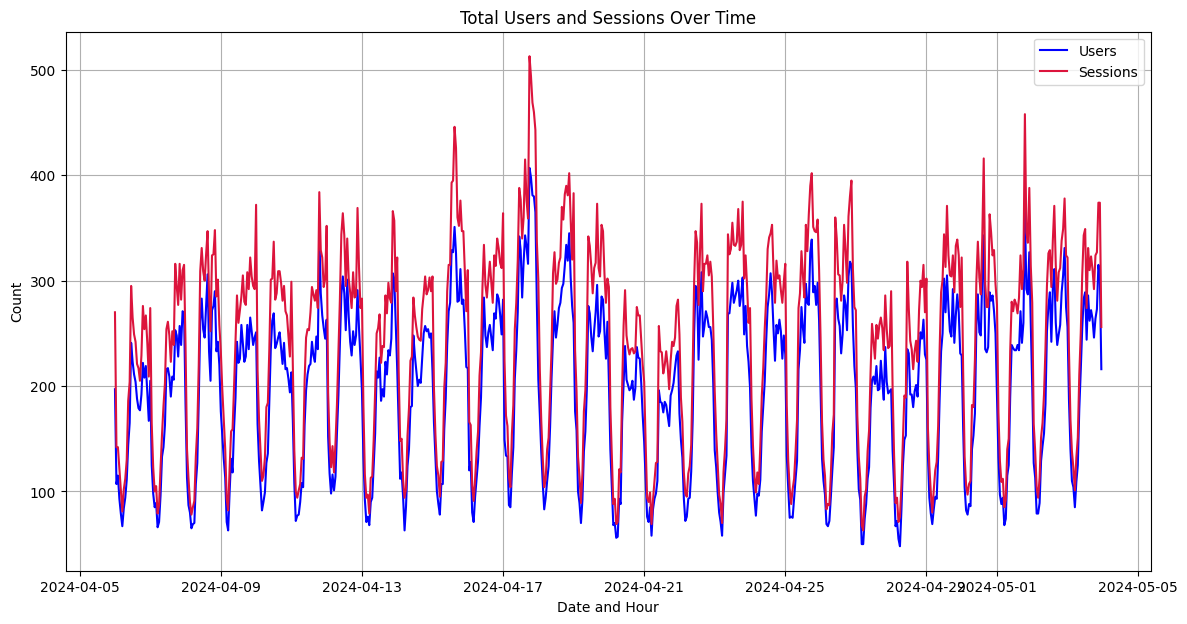

In [12]:
# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='crimson')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

#### Observations:

###### From the graph, we can observe there are some fluctuations in the number of users and sessions, possibly indicating daily cycles or specific high-traffic periods. Both users and sessions appear to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks might correspond to specific marketing activities, promotions, or events.

#### User Engagement Analysis. 
###### *We will look into metrics like average engagement time per session, engagement rate, and events per session to evaluate how engaged users are when they visit the site:*


In [13]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})
engagement_metrics.head(5)

,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate
Date + hour (YYYYMMDDHH),,,,
2024-04-06 00:00:00,55.070258,0.607673,3.610049,0.450262
2024-04-06 01:00:00,49.115957,0.644213,4.719012,0.489905
2024-04-06 02:00:00,66.270536,0.736716,5.372024,0.595759
2024-04-06 03:00:00,52.273710,0.568105,4.691984,0.446725
2024-04-06 04:00:00,67.222410,0.603943,4.686724,0.494964


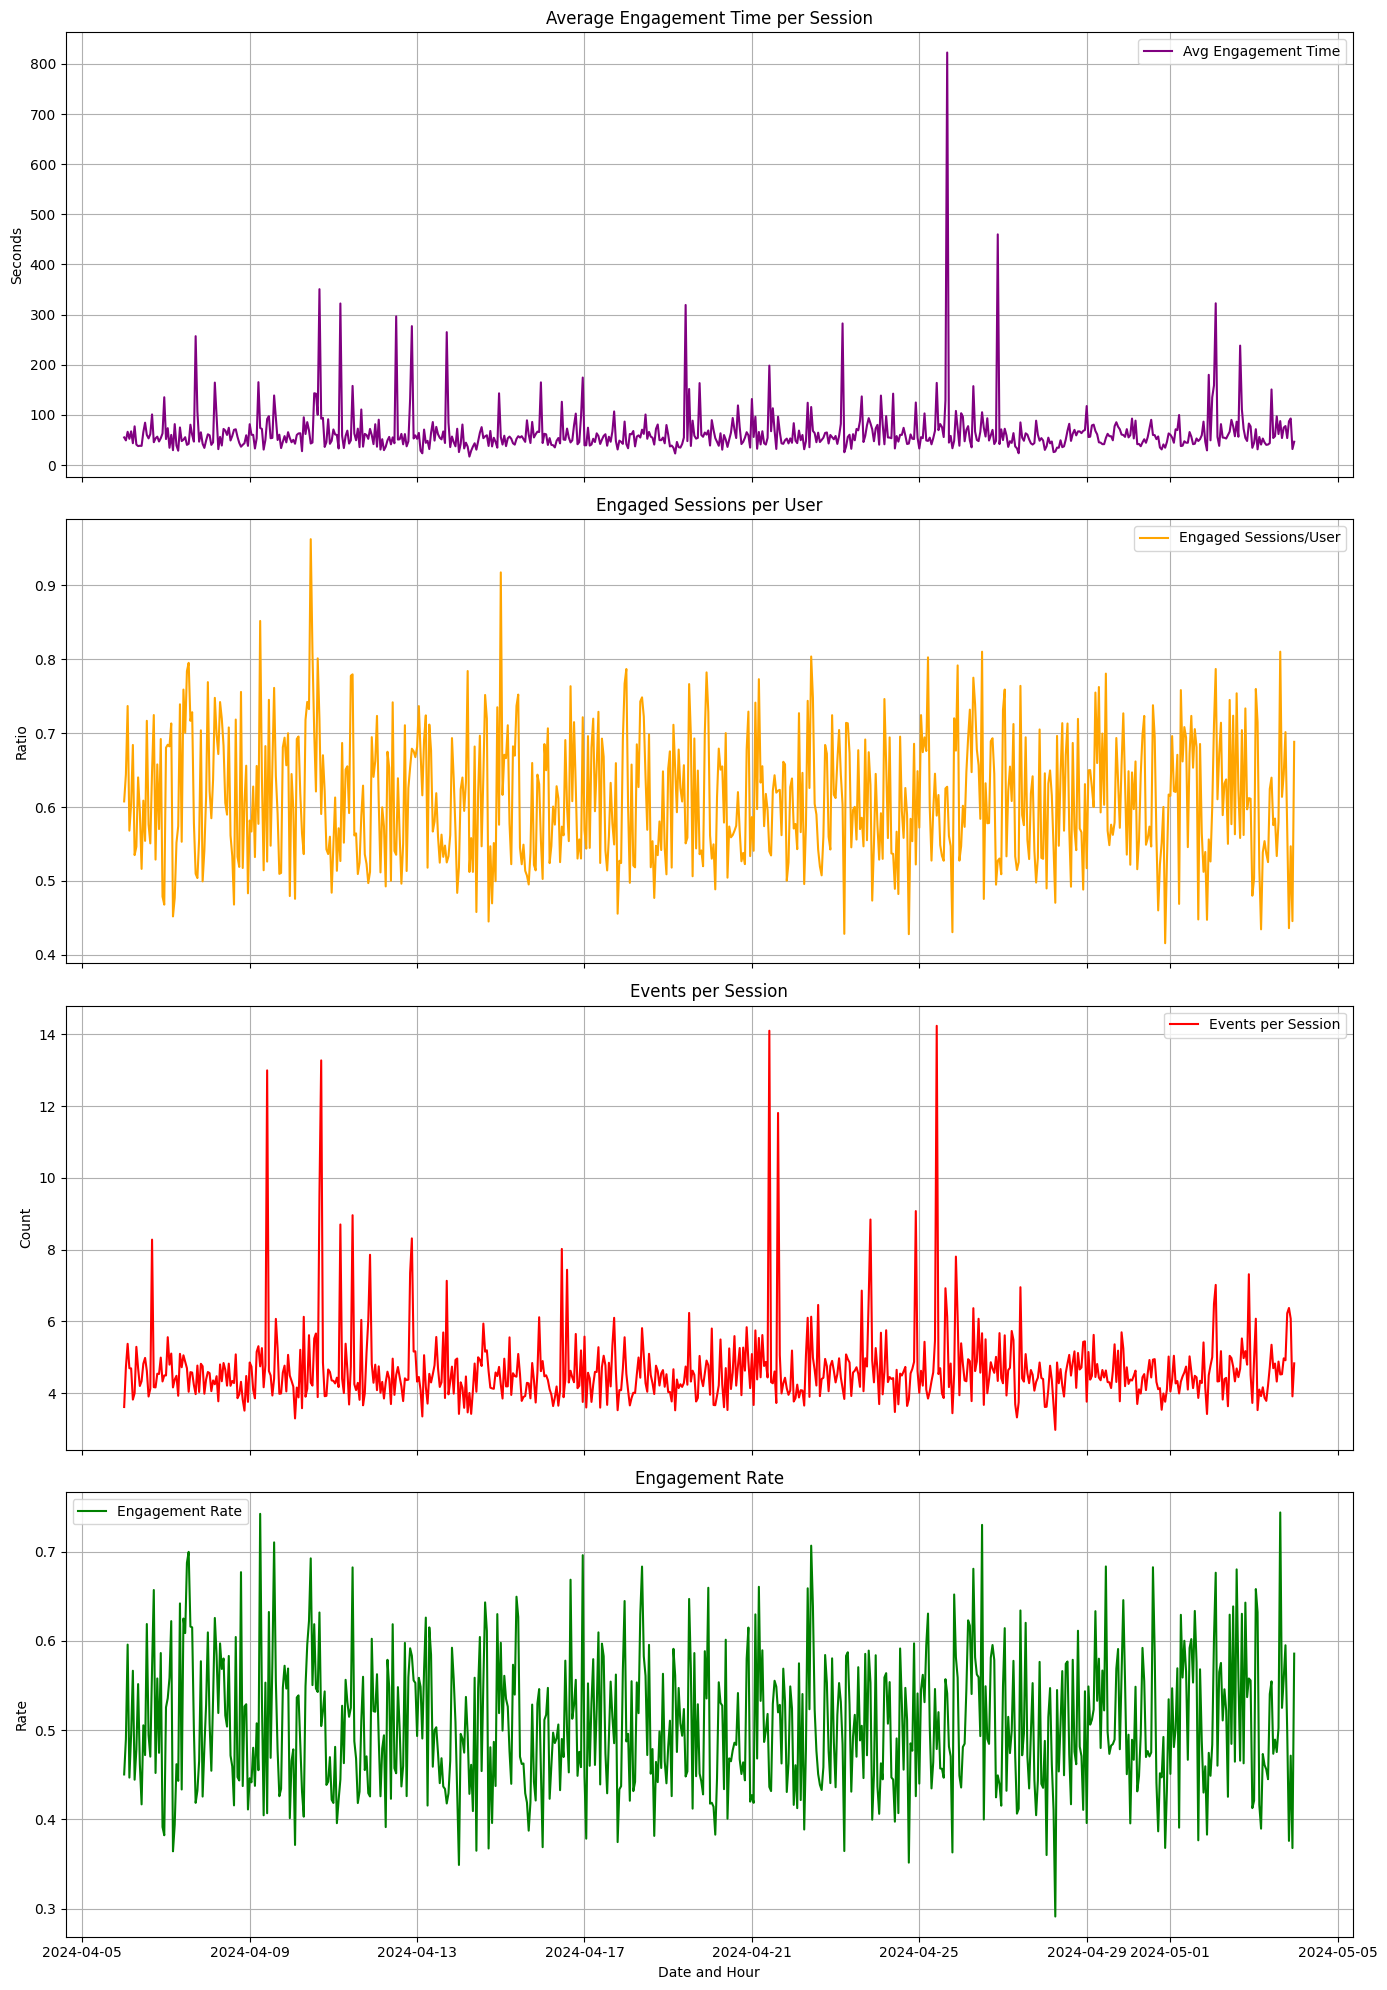

In [14]:
# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

#### The user engagement analysis provides insights into how visitors interact with the website:

###### 1._Average Engagement Time per Session:_ *The time spent per session shows fluctuations over the observed period. There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events.*

###### 2._Engaged Sessions per User:_ *This ratio fluctuates slightly but generally indicates that a good portion of sessions per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging.*

###### 3._Events per Session:_ *The count of events per session remains relatively consistent but does show some variation. Peaks here could indicate more interactive content or features being used by visitors.*

###### 4._Engagement Rate:_ *The engagement rate over time shows how many sessions are considered engaged out of the total. There are some ups and downs which may relate to how different content resonates with users or how effective certain user acquisition channels are.*

##### Now, let’s analyze the correlations between them:

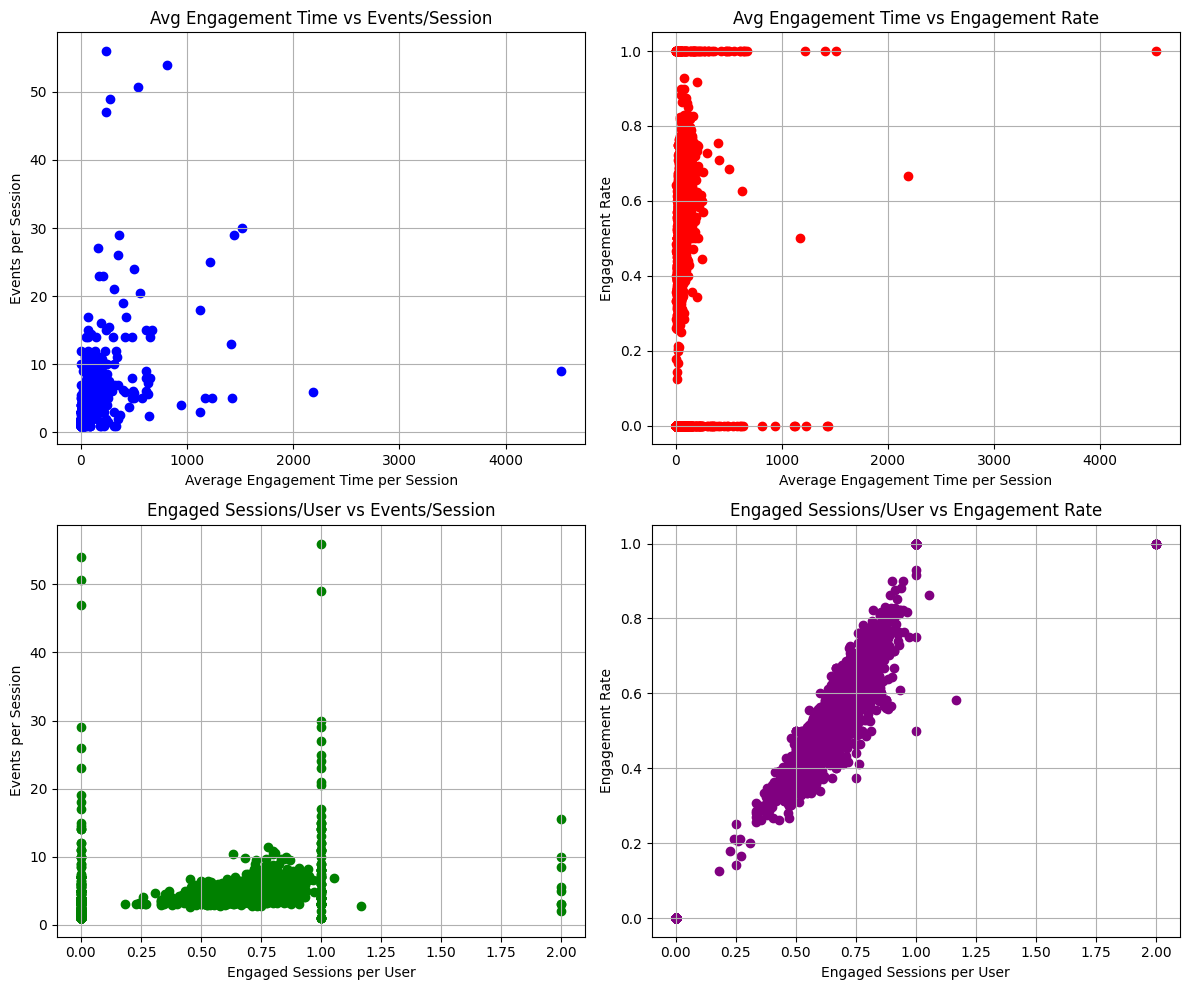

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

### *Here’s what we can analyze from the above scatter plots:*
###### 1.Average Engagement Time vs Events per Session: There appears to be a concentration of data points at lower average engagement times with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more narrowly around lower values.

###### 2.Average Engagement Time vs Engagement Rate: There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.

###### 3.Engaged Sessions per User vs Events per Session: Most data points cluster at lower values for both metrics, with few users having a high number of engaged sessions or events per session.

###### 4.Engaged Sessions per User vs Engagement Rate: There is a strong positive correlation between engaged sessions per user and engagement rate, especially noticeable at higher values of engaged sessions per user.

#### Channel Performance Analysis:

###### _This is to assess how different marketing channels contribute to traffic and engagement. It will involve analyzing the session, user, and engagement data segmented by the marketing channel:_

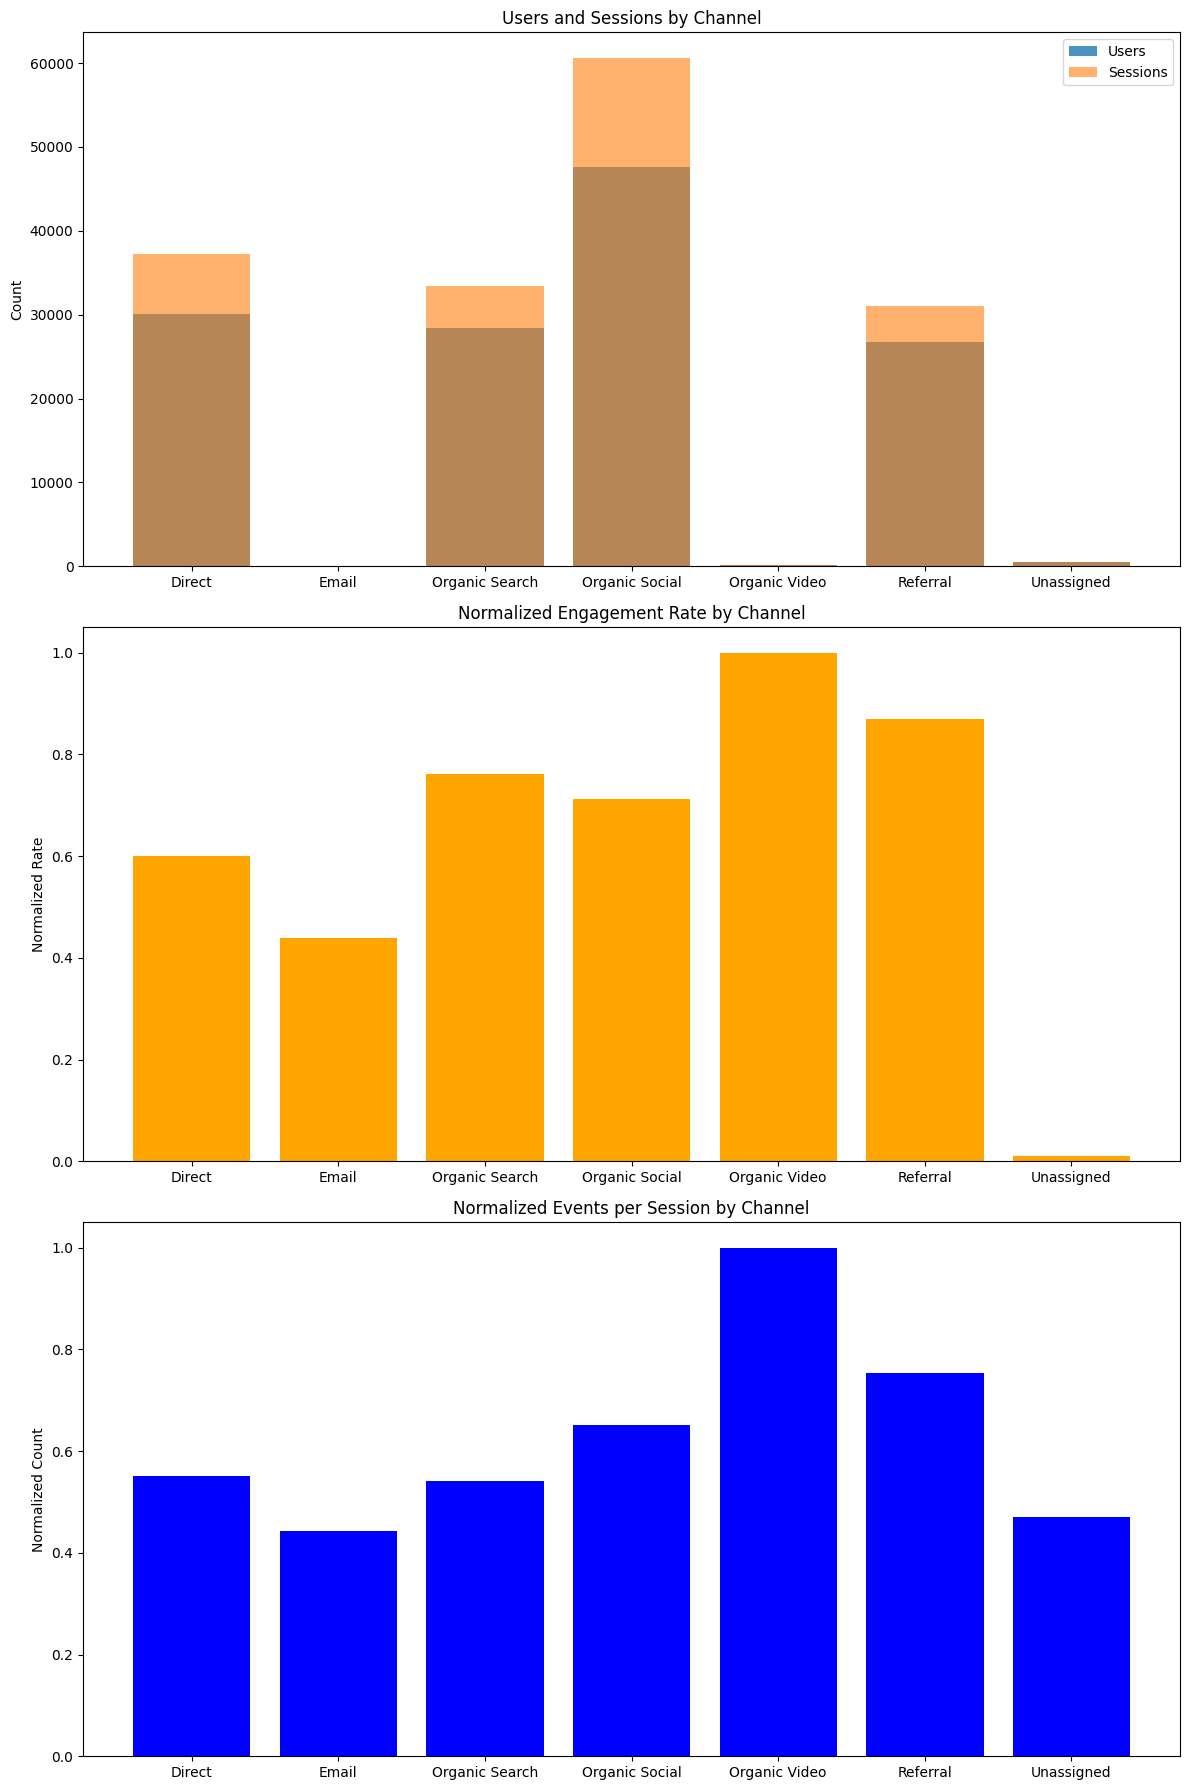

In [16]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='blue')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

#### Observations: 

1. The data illustrates significant variations in performance across different channels, highlighting the strengths and weaknesses of each in driving traffic, engaging users, and encouraging interactions.
 
2. The high performance of ‘Organic Search’ in driving traffic contrasts with its lower relative engagement and events metrics, suggesting quantity over quality of visits. In contrast, ‘Referral’ and ‘Organic Video’ channels, while not leading in volume, excel in engaging users deeply, pointing to potential areas for leveraging these strengths in marketing strategies.



# __Conclusion__:

####
1. Traffic Trends: The analysis revealed consistent fluctuations in traffic, with peak sessions and user counts linked to specific hours, likely influenced by campaigns or promotions.

2. Engagement Patterns: Metrics such as average engagement time and events per session showed notable peaks, highlighting the effectiveness of specific content or features during those times.

3. Channel Performance: Organic Search emerged as the primary traffic driver, although channels like Referral and Organic Video had better engagement and interaction metrics, pointing to their potential for strategic prioritization.

4. Correlation Insights: A positive correlation was observed between engaged sessions per user and engagement rate, underscoring the importance of retaining engaged users to boost overall website performance.

5. Strategic Recommendations: Suggestions included optimizing content during peak traffic hours, focusing on high-performing channels like Referral, and improving engagement through interactive content to capitalize on user interest.

#### __Outcome:__ This analysis enabled actionable strategies to optimize marketing efforts and user engagement, driving better alignment with business goals and improving overall website performance.

##### Github Link for the Project: https://github.com/bhaskarharshit/Website-Performance-Analysis/upload/main

### $Thank you!$